# EDA Detección de Fraudes Financieros.

Carga el Dataset desde Drive.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data1 = '/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv'

In [4]:
!ls /content/drive/MyDrive/PS_20174392719_1491204439457_log.csv

/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv


Carga librerias.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga los datos.

In [7]:
test_data1 = pd.read_csv(data1)
test_data1.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Verifica la Cantidad de filas existentes.


In [8]:
test_data1.shape

(6362620, 11)

Verifica los valores nulos.

In [9]:
test_data1.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Comprobar descripción del dataframe, tipos de datos y valores faltantes.

In [10]:
test_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


El DataFrame tiene 6.362.620 entradas con 11 columnas, 5 de tipo float64, 3 de tipo int64 y 3 de tipo object, lo que requiere más de 534 MB de memoria.

In [11]:
test_data1.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Acá proporciona un resumen de métricas estadísticas para las columnas numéricas del DataFrame, esto ayuda a obtener una descripción general rápida de la distribución y las características del mismo.

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


Text(0.5, 1.0, 'Gráfico 1: Distribución del tipo de transacción')

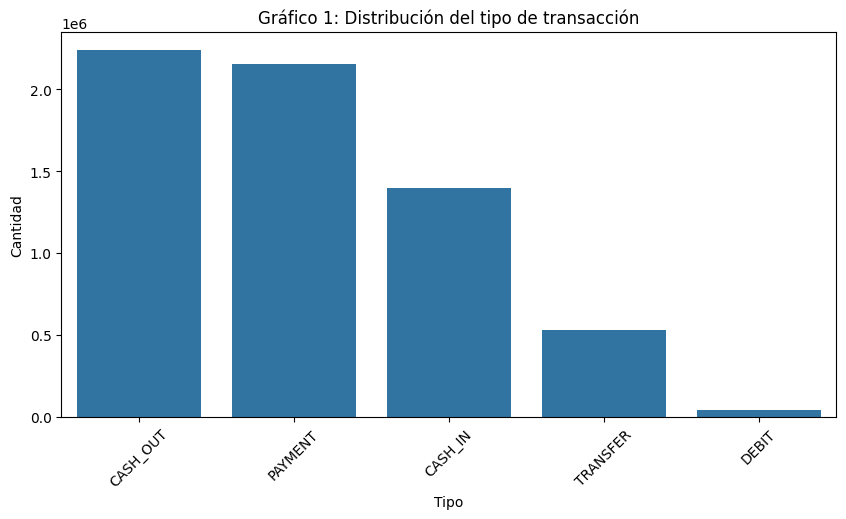

In [12]:
print(test_data1['type'].value_counts())

plt.rcParams['figure.figsize']=[10,5]
sns.countplot(x='type', data=test_data1, order=test_data1['type'].value_counts().index)
plt.xticks(rotation= 45)
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Gráfico 1: Distribución del tipo de transacción')


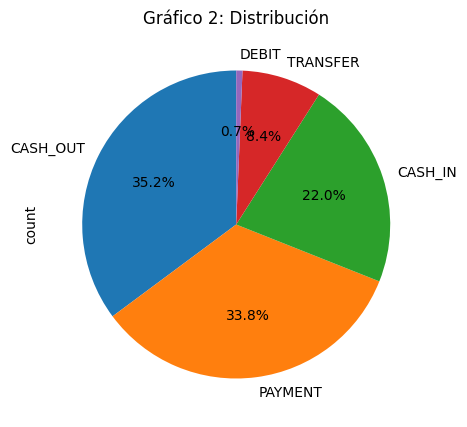

In [13]:

test_data1['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Gráfico 2: Distribución')
plt.show()

En el gráfico 1 tenemos la frecuencia de cada tipo de transacción. donde encontramos que CASH-OUT y PAYMENT son los más comunes, con alrededor de 2 millones de casos cada uno. Siendo El CASH-IN menos frecuente, seguido de  TRANSFER. DEBIT es el menos común y muestra una actividad mínima.

En el gráfico 2 tenemos  la distribución porcentual de los tipos de transacciones. Podemos observar que CASH-OUT tiene la proporción más alta con un 35,2%, seguido de cerca por el PAYMENT con un 33,8%. CASH-IN representa el 22,0%, TRANSFER es el 8,4%. Siendo así DEBIT la porción más pequeña y comprende solo el 0,7% de las transacciones.



In [14]:
test_data1['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [15]:
test_data1['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [16]:
percent= (8213/6362620)*100
percent

0.12908204481801522

Los datos muestran que de 6.362.620 transacciones 8.213 son fraudulentas. Esto da como resultado un porcentaje de fraude de aproximado de 0,13 %, lo que indica una baja incidencia de actividad fraudulenta en el dataframe.

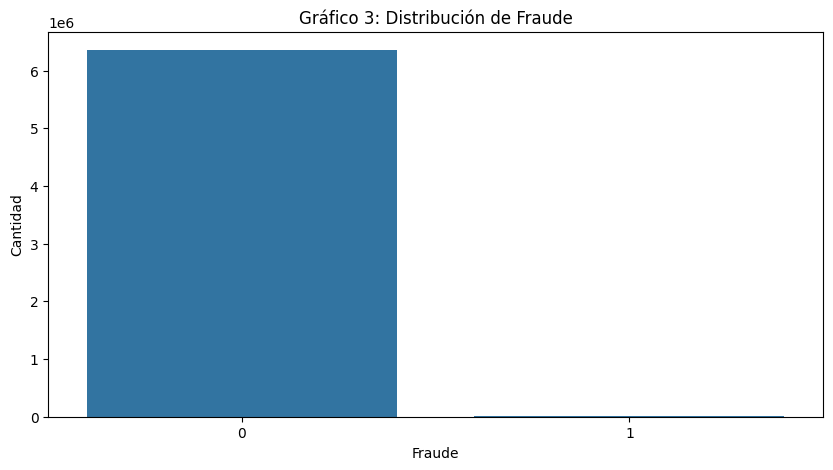

In [17]:
sns.countplot(x='isFraud', data=test_data1)
plt.rcParams['figure.figsize']=[10,5]
plt.xlabel('Fraude')
plt.ylabel('Cantidad')
plt.title('Gráfico 3: Distribución de Fraude')
plt.show()

El gráfico de recuento de la visualización muestra la distribución del fraude (donde isFraud es 1) frente a las transacciones no fraudulentas (donde isFraud es 0).

In [18]:
test_data1[(test_data1['isFraud'] == 1)]['type'].value_counts()

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

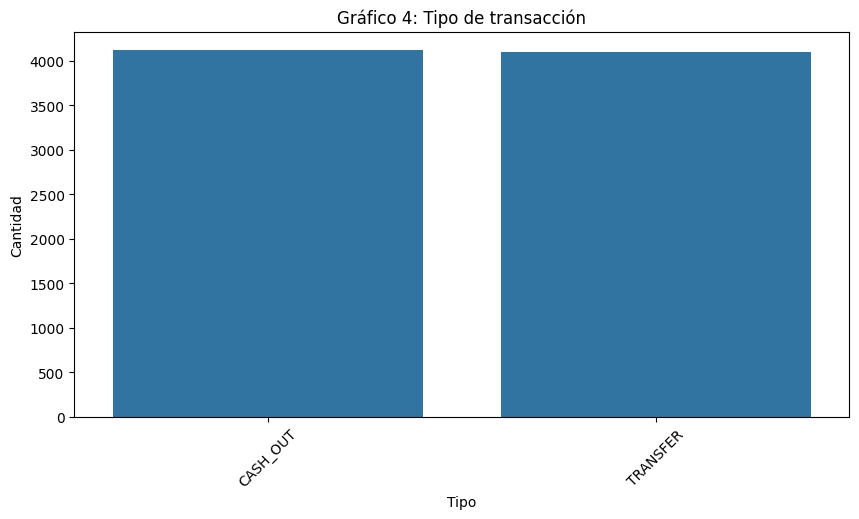

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x='type', data=test_data1[(test_data1['isFraud'] == 1)], order=test_data1[(test_data1['isFraud'] == 1)]['type'].value_counts().index)
plt.xticks(rotation= 45)
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Gráfico 4: Tipo de transacción')
plt.show()

Acá podemos observar que las transacciones fraudulentas sólo se presentan cuando es de tipo TRANSFER y CASH_OUT.